### Mini Project
### Research Question
To what extent is the Life expactancy in a country related to the GDP Per Capita? Is there a stronger relation in poor (Group I), developing (Group II) or rich (Group III) countries (measured in GDP?)

### BLOCK I: PREPARATION / SETTINGS

In [51]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Check if folders input and output exist, if not create them
if not os.path.exists('input'):
    os.makedirs('input')
if not os.path.exists('output'):
    os.makedirs('output')

In [52]:
# Define all constants / settings for further process
LIFE_EXPECTANCY_CODE = 'SP.DYN.LE00.IN'
GNI_PER_CAPITA_CODE = 'NY.GNP.PCAP.KD'
YEAR_MIN = 2000
YEAR_MAX = 2010

# Input file names
INDICATORS_FILE = 'input/Indicators.csv'

### BLOCK II: DATA EXPLORATION

In [53]:
# Read full incidators file as constant for reference
indicators_df = pd.read_csv(INDICATORS_FILE)

# Filtering for specific years and setting as constant for further process
INDICATORS_DF = indicators_df[(indicators_df['Year'] >= YEAR_MIN) & (indicators_df['Year'] <= YEAR_MAX)]


In [54]:
# Create Dataframe for Life Expectancy
life_expectancy_df = INDICATORS_DF[INDICATORS_DF['IndicatorCode'] == LIFE_EXPECTANCY_CODE]
# Rename column Value to LifeExpectancy
life_expectancy_df = life_expectancy_df.rename(columns={'Value': 'LifeExpectancy'})
# Print unique countries
print('Unique countries in Life Expectancy data: {}'.format(len(life_expectancy_df['CountryCode'].unique())))

# Create Dataframe for GNI per Capita
gni_per_capita_df = INDICATORS_DF[INDICATORS_DF['IndicatorCode'] == GNI_PER_CAPITA_CODE]
# Rename column Value to GNIperCapita
gni_per_capita_df = gni_per_capita_df.rename(columns={'Value': 'GNIperCapita'})
# Print unique countries
print('Unique countries in GNI per Capita data: {}'.format(len(gni_per_capita_df['CountryCode'].unique())))

# Merge all dataframes into one as constant to make it immutable
merged_df = pd.merge(life_expectancy_df, gni_per_capita_df, how='left', on=['CountryCode', 'Year'])
merged_df.head()

Unique countries in Life Expectancy data: 240
Unique countries in GNI per Capita data: 229


,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year,LifeExpectancy,CountryName_y,IndicatorName_y,IndicatorCode_y,GNIperCapita
0,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,67.826949,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,69.438262,NaN,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,72.719690,NaN,NaN,NaN,NaN
3,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,71.662834,East Asia & Pacific (all income levels),GNI per capita (constant 2005 US$),NY.GNP.PCAP.KD,4085.942878
4,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,70.690575,East Asia & Pacific (developing only),GNI per capita (constant 2005 US$),NY.GNP.PCAP.KD,1118.317261


In [55]:
# Classify countries into low-income, lower-middle-income, upper-middle-income and high-income
# based on World Bank income group classification as per 2015
# https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

def classify_country(row):
    if 'GNIperCapita' not in row or pd.isnull(row['GNIperCapita']):
        return 'Unknown'
    if row['GNIperCapita'] <= 1100:
        return 'Low-income'
    elif row['GNIperCapita'] <= 4200:
        return 'Lower-middle-income'
    elif row['GNIperCapita'] <= 13000:
        return 'Upper-middle-income'
    else:
        return 'High-income'
    
def classify_country2(row):
    return 'Test'

# Selecting a reference year equal to the latest year to allocate country
country_cat_df = merged_df[merged_df['Year'] == YEAR_MAX]

country_cat_df['CountryCat'] = country_cat_df.apply(classify_country, axis=1)

# Join country category with merged dataframe
MERGED_DF = pd.merge(merged_df, country_cat_df[['CountryCode', 'CountryCat']], how='left', on=['CountryCode'])

MERGED_DF.head()


C:\Users\timou\AppData\Local\Temp\ipykernel_18904\3824537430.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_cat_df['CountryCat'] = country_cat_df.apply(classify_country, axis=1)


,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year,LifeExpectancy,CountryName_y,IndicatorName_y,IndicatorCode_y,GNIperCapita,CountryCat
0,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,67.826949,NaN,NaN,NaN,NaN,Unknown
1,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,69.438262,NaN,NaN,NaN,NaN,Unknown
2,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,72.719690,NaN,NaN,NaN,NaN,Unknown
3,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,71.662834,East Asia & Pacific (all income levels),GNI per capita (constant 2005 US$),NY.GNP.PCAP.KD,4085.942878,Upper-middle-income
4,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,70.690575,East Asia & Pacific (developing only),GNI per capita (constant 2005 US$),NY.GNP.PCAP.KD,1118.317261,Lower-middle-income


C:\Users\timou\AppData\Local\Temp\ipykernel_18904\3555132349.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_country = MERGED_DF[['CountryCode',


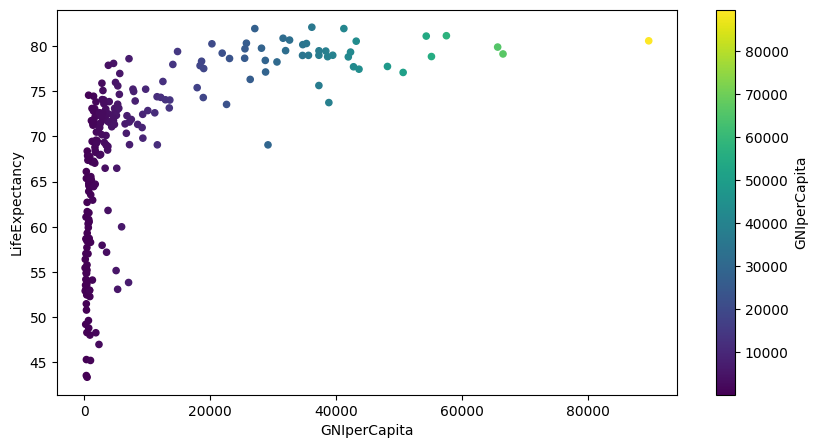

In [56]:
# Aggregate data by country
merged_grouped_country = MERGED_DF[['CountryCode',
                                    'LifeExpectancy',
                                    'GNIperCapita',
                                    'CountryCat']].groupby(['CountryCode']).mean()


merged_grouped_country['GNIperCapita'] = merged_grouped_country['GNIperCapita']

# Scatter plot of Gini Coefficient vs CO2 Emissions with country code as label
ax = merged_grouped_country.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', c='GNIperCapita', figsize=(10, 5))

KeyError: 4

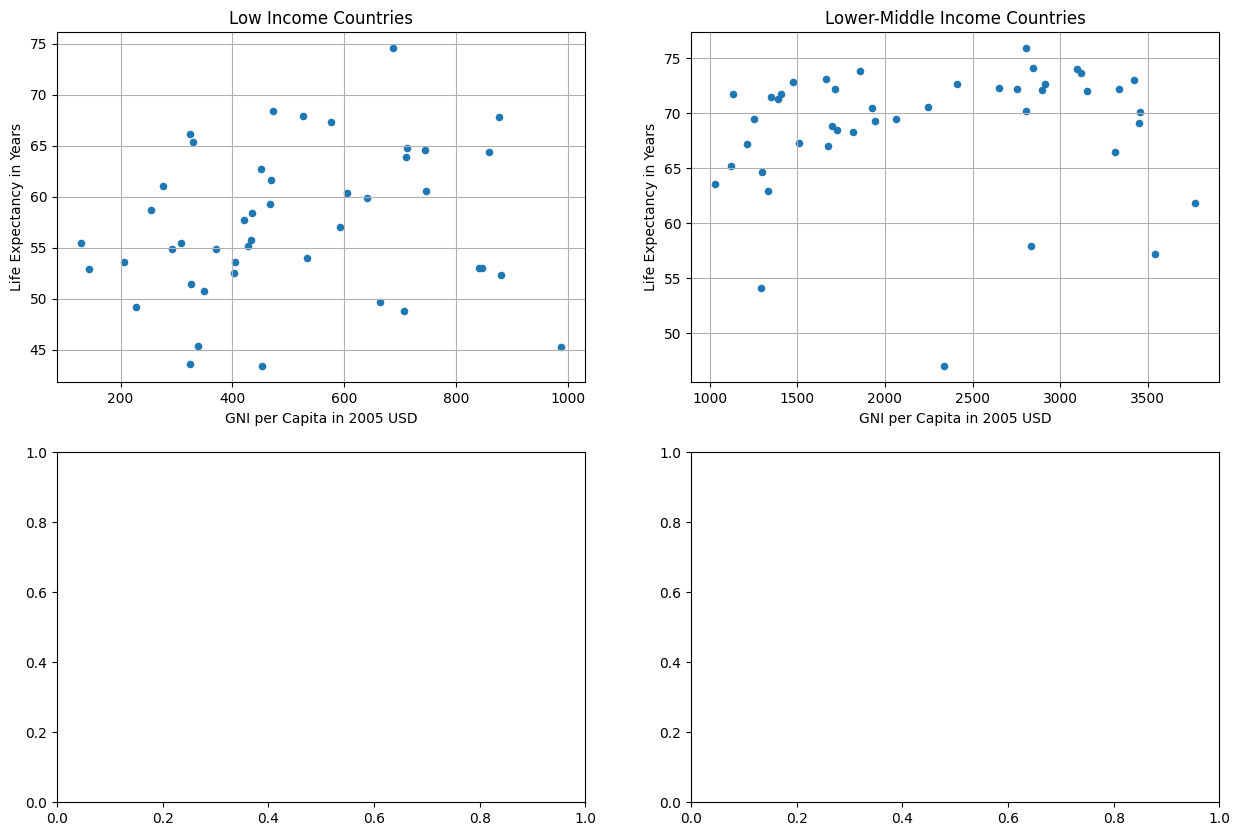

In [61]:
# Merge CountryCat with merged_grouped_country
merged_grouped_country_cat = pd.merge(merged_grouped_country, country_cat_df[['CountryCode', 'CountryCat']], how='left', on=['CountryCode'])

# Dataframe for countries with low income
low_income_df = merged_grouped_country_cat[merged_grouped_country_cat['CountryCat'] == 'Low-income']
# Dataframe for countries with lower-middle income
lower_middle_income_df = merged_grouped_country_cat[merged_grouped_country_cat['CountryCat'] == 'Lower-middle-income']
# Dataframe for countries with upper-middle income
upper_middle_income_df = merged_grouped_country_cat[merged_grouped_country_cat['CountryCat'] == 'Upper-middle-income']
# Dataframe for countries with high income
high_income_df = merged_grouped_country_cat[merged_grouped_country_cat['CountryCat'] == 'High-income']

# Generate 4 scatter plots for each income group
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

x_label = "GNI per Capita in 2005 USD"
y_label = "Life Expectancy in Years"

# Plot for low income countries
low_income_df.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', grid=True, xlabel=x_label, ylabel=y_label, ax=axes[0, 0])
axes[0, 0].set_title('Low Income Countries')

# Plot for lower-middle income countries
lower_middle_income_df.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', grid=True, xlabel=x_label, ylabel=y_label, ax=axes[0, 1])
axes[0, 1].set_title('Lower-Middle Income Countries')
# Add labels with country code to each datapoint
for i, txt in enumerate(lower_middle_income_df.index):
    # Labeling outliers
    if lower_middle_income_df['LifeExpectancy'].iloc[i] < 65:
        axes[0, 1].annotate(lower_middle_income_df['CountryCode'][i], (lower_middle_income_df['GNIperCapita'].iloc[i], lower_middle_income_df['LifeExpectancy'].iloc[i]), color='red')

upper_middle_income_df.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', grid=True, xlabel=x_label, ylabel=y_label, ax=axes[1, 0])
axes[1, 0].set_title('Upper-Middle Income Countries')

# Plot for high income countries
high_income_df.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', grid=True, xlabel=x_label, ylabel=y_label, ax=axes[1, 1])
axes[1, 1].set_title('High Income Countries')

# Calculate correlation between Life Expectancy and GNI per Capita for each income group
print('Correlation between Life Expectancy and GNI per Capita for Low Income Countries: {}'.format(low_income_df['LifeExpectancy'].corr(low_income_df['GNIperCapita'])))
print('Correlation between Life Expectancy and GNI per Capita for Lower-Middle Income Countries: {}'.format(lower_middle_income_df['LifeExpectancy'].corr(lower_middle_income_df['GNIperCapita'])))
print('Correlation between Life Expectancy and GNI per Capita for Upper-Middle Income Countries: {}'.format(upper_middle_income_df['LifeExpectancy'].corr(upper_middle_income_df['GNIperCapita'])))
print('Correlation between Life Expectancy and GNI per Capita for High Income Countries: {}'.format(high_income_df['LifeExpectancy'].corr(high_income_df['GNIperCapita'])))

# Add label to specific datapoint in lower-middle income countries
axes[0, 1].annotate('Swaziland / SWZ', xy=(2330, 47))

KeyError: 0

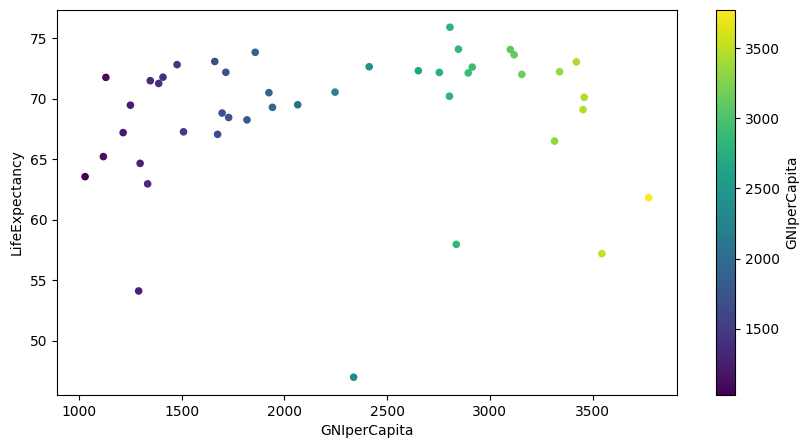

In [58]:
# Scatterplot of lower-middle income countries
lower_middle_income_df.plot(kind='scatter', x='GNIperCapita', y='LifeExpectancy', c='GNIperCapita', figsize=(10, 5))
# Add labels to each datapoint with country code
for i, txt in enumerate(lower_middle_income_df.index):
    plt.annotate(txt, (lower_middle_income_df['GNIperCapita'][i], lower_middle_income_df['LifeExpectancy'][i]))

In [ ]:
# Sort lower-middle income countries by life expectancy
lower_middle_income_df = lower_middle_income_df.sort_values(by='LifeExpectancy', ascending=True)
# Save lower-middle income countries to excel
lower_middle_income_df.to_excel('lower_middle_income_countries2.xlsx', index=False)
# Print top 10 countries
print(lower_middle_income_df[['CountryCode', 'LifeExpectancy']].head(10))

    CountryCode  LifeExpectancy
206         SWZ       46.980282
39          COG       54.104282
155         NAM       57.183756
168         OSS       57.954826
200         SST       61.812334
215         TMP       62.952455
24          BOL       63.547645
28          BTN       64.646869
148         MNG       65.204095
106         KAZ       66.484501


In [ ]:
# Calculate correlation coefficients for all columns
merged_grouped_country.corr()


C:\Users\timou\AppData\Local\Temp\ipykernel_18904\109304150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_grouped_country.corr()


,LifeExpectancy,GNIperCapita
LifeExpectancy,1.000000,0.600061
GNIperCapita,0.600061,1.000000


In [ ]:
# Exlcude RUS, EST AND KAZ from index
merged_grouped_country = merged_grouped_country.drop(['RUS', 'EST', 'KAZ'])

# Calculate correlation coefficients for all columns
merged_grouped_country.corr()


KeyError: "['RUS', 'EST', 'KAZ'] not found in axis"